In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

### Looping through multiple pages

In [4]:
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup as bs

In [5]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [6]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [7]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

### Save results to a Dataframe, then export as CSV

In [8]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
...,...,...,...,...
105,4.0 out of 5 stars\nBest,4.0,Best budget friendly smart watch.,Reviewed in India on 25 August 2023
106,4.0 out of 5 stars\nIssue in watch,4.0,My watch is not working properly and it's in w...,Reviewed in India on 1 August 2023
107,4.0 out of 5 stars\nI like it this product.......,4.0,ഇങ്ങനെയും ചില അലാംകൊളംങ്ങൾ ഉഷാറായിരിക്കുന്നു 😌❤,Reviewed in India on 30 August 2023
108,4.0 out of 5 stars\nnice product,4.0,nice product,Reviewed in India on 4 September 2023


In [9]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [10]:
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
5,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023
6,4.0 out of 5 stars\nSuper watch,4.0,Boat xtend watch is very nice all features...,1 November 2023
7,4.0 out of 5 stars\nPremium quality Value for ...,4.0,"Awesome design, sound and features. Also have ...",31 October 2023
8,4.0 out of 5 stars\nGood Quality,4.0,Product also good need to update advance featu...,30 October 2023
9,4.0 out of 5 stars\nNice one,4.0,Good product...thanxx,2 November 2023


In [11]:
df.to_csv("BoatSmartWatch_Review.csv")

In [12]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
...,...,...,...,...
105,4.0 out of 5 stars\nBest,4.0,Best budget friendly smart watch.,25 August 2023
106,4.0 out of 5 stars\nIssue in watch,4.0,My watch is not working properly and it's in w...,1 August 2023
107,4.0 out of 5 stars\nI like it this product.......,4.0,ഇങ്ങനെയും ചില അലാംകൊളംങ്ങൾ ഉഷാറായിരിക്കുന്നു 😌❤,30 August 2023
108,4.0 out of 5 stars\nnice product,4.0,nice product,4 September 2023


In [13]:
reviews.Rating.describe()

count    110.000000
mean       3.845455
std        0.510196
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [15]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [16]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


### Date vs Review Count

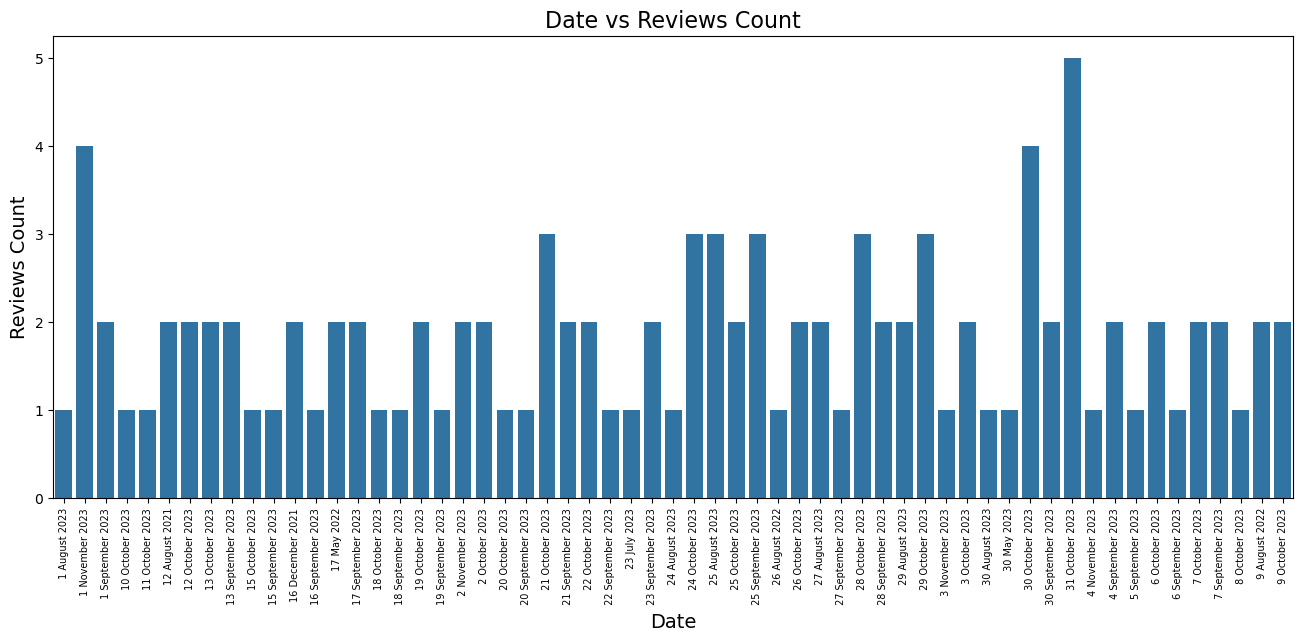

In [17]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

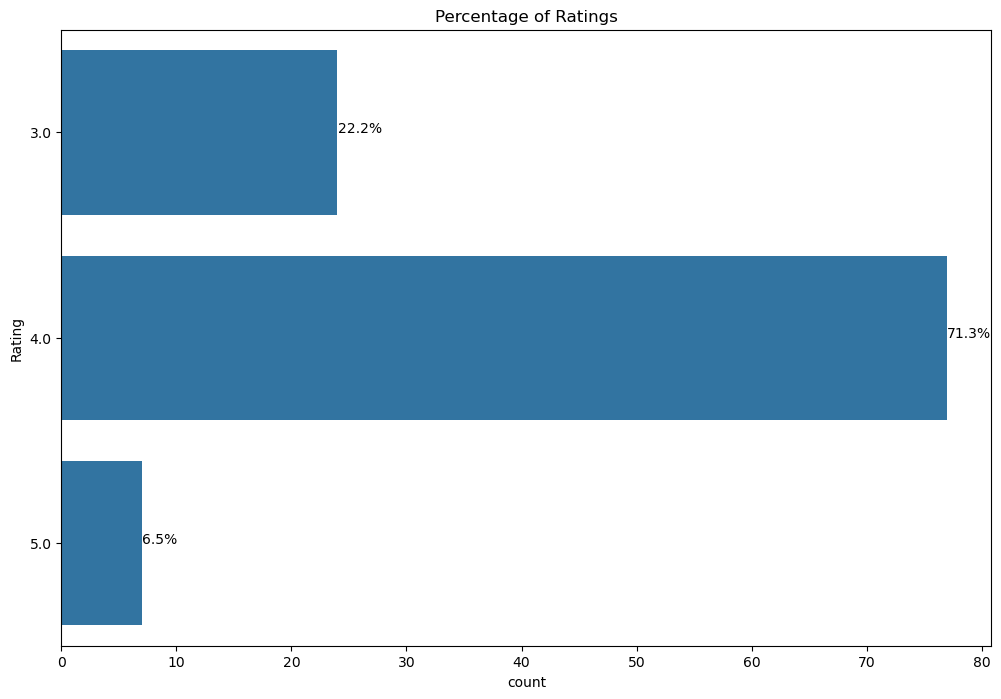

In [18]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Spelling Correction

In [19]:
from textblob import TextBlob

In [20]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    His smart (model Coat extend plus) watch is sa...
4    Gros:1. Premium build quality with matter fini...
Name: Review, dtype: object

In [21]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,This smart (model Boat extend plus) watch is f...
4,Pros:1. Premium build quality with matte finis...
...,...
105,Best budget friendly smart watch.
106,My watch is not working properly and it's in w...
107,ഇങ്ങനെയും ചില അലാംകൊളംങ്ങൾ ഉഷാറായിരിക്കുന്നു 😌❤
108,nice product


### Resetting index

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
boat_review.reset_index(drop=True, inplace=True)

In [24]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [25]:
import re
from nltk.stem import WordNetLemmatizer

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [28]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


## Text Pre-processing Techniques

### A. Removing '@names'

In [29]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [30]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### B. Removing links (http | https)

In [31]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### C. Removing Review with empty text

In [32]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### D. Dropping duplicate rows

In [33]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### E. Function to remove emoji

In [34]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### F. Removing Stop words

In [36]:
import codecs

In [37]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [38]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [39]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
6,boat xtend watch nice feature,boat xtend watch nice features...
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza..."
8,product also good need update advance feature ...,product also good need update advance features...
9,good product thanxx,good product...thanxx


### G. Tokenize 'Clean_Reviews'

In [40]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [41]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [smart, model, boat, extend, plus, watch, func...
4    [pro, premium, build, quality, matte, finishin...
5    [good, quality, watch, budget, cannot, used, t...
6                  [boat, xtend, watch, nice, feature]
7    [awesome, design, sound, feature, also, custom...
8    [product, also, good, need, update, advance, f...
9                              [good, product, thanxx]
Name: Clean_Reviews, dtype: object

In [42]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
5,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra...","[good, quality, watch, budget, can, not, used,..."
6,boat xtend watch nice feature,boat xtend watch nice features...,"[boat, xtend, watch, nice, feature]"
7,awesome design sound feature also customizable...,"awesome design, sound features. also customiza...","[awesome, design, sound, feature, also, custom..."
8,product also good need update advance feature ...,product also good need update advance features...,"[product, also, good, need, update, advance, f..."
9,good product thanxx,good product...thanxx,"[good, product, thanxx]"


### H. Converting words to Stemmer

In [43]:
from nltk.stem.snowball import SnowballStemmer

In [44]:
stemmer = SnowballStemmer("english")

In [45]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,smart model boat extend plus watch function we...
4,pro premium build qualiti matt finish sturdi p...
...,...
102,medium could load good bodi special jet black ...
103,best budget friend smart watch
104,watch work proper warranti period unabl contac...
106,nice product


### I. Converting words to Lemma

In [46]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,smart model boat extend plus watch functioning...
4,pro premium build quality matte finishing stur...
...,...
102,medium could loaded good body specially jet bl...
103,best budget friendly smart watch
104,watch working properly warranty period unable ...
106,nice product


## Basic Feature Extaction
### A. Applying bag of Words without N grams

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [49]:
print(cv.get_feature_names_out()[109:200])

['better' 'beyond' 'bezel' 'bezzels' 'bhi' 'big' 'bike' 'bip' 'bit'
 'black' 'bloated' 'blood' 'bluetooth' 'boat' 'body' 'bother' 'bought'
 'box' 'bp' 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings'
 'brother' 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi'
 'built' 'bulb' 'burnt' 'bus' 'button' 'buy' 'buying' 'cable' 'cache'
 'calculated' 'calculating' 'calculation' 'calculator' 'calender' 'call'
 'called' 'caller' 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot'
 'capability' 'carddesign' 'care' 'case' 'category' 'catering' 'caused'
 'center' 'centerbefore' 'certain' 'change' 'changed' 'charge' 'charger'
 'charging' 'charm' 'cheap' 'check' 'checked' 'checking' 'childish'
 'chinese' 'choice' 'claim' 'claimed' 'classic' 'clean' 'clear' 'clearing'
 'clearly' 'click' 'clipuser' 'clone' 'close' 'cloud']


In [50]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advance' 'advanced' 'advertised' 'aggregate'
 'alarm' 'alert' 'alexa' 'allow' 'allowed' 'allowing' 'almost' 'alright'
 'also' 'alternative' 'aluminium' 'always' 'amazfit' 'amazon' 'amazoni'
 'amezonother' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'anniversary' 'another' 'answer' 'anyone' 'anyonefor'
 'anything' 'anytime' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'apple' 'appreciate' 'apps'
 'appyou' 'around' 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm'
 'attached' 'attaching' 'attention' 'attractive' 'audio' 'auto'
 'available' 'average' 'away' 'awesome' 'back' 'background' 'bad' 'badge'
 'band

In [51]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [52]:
from nltk.stem.porter import PorterStemmer

In [53]:
dataframe = dataframe.reset_index(drop=True)

In [54]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [55]:
corpus[3]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

### Applying Countvectorizer (Creating the Bag of Words model)

In [56]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [57]:
X.shape

(106, 1546)

In [58]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'advanc', 'alarm', 'alarm set', 'alarm timer', 'alert',
       'alexa', 'alexa support', 'alexa watch', 'alexa work'],
      dtype=object)

In [59]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [60]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt
0,0,1,4,3,0,0,1,0,0,1,...,0,4,2,2,0,20,7,1,1,0
1,0,0,3,1,1,1,3,0,1,2,...,0,0,0,0,0,1,0,1,1,0
2,1,1,0,1,0,0,6,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,2,0
4,3,0,3,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### C. TF-IDF Vectorizer

In [61]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [62]:
corpus[4]

'pro premium build qualiti matt finish sturdi polycarbon frame good soft silicon strap r absolut flush bodi watch attract trendi colour heart rate except heart rate spike weight train pedomet step counter accur spo compar puls oximet read smart watch offer accuraci sleep track accur bed time wake time durat stage sleep inaccur light deep sleep wake detect rem sleep detect sleep data watch synchronis smoothli boat wave app issu warn msg watch worn hand properli detect data surfac larg clear bright sharp lcd ip display even sun touch smooth experienc jitter ui also lag time attach temper glass sometim function requir tap work accept scroll respons finger move diagon instead vertic app gp work superbl excel rout track map featur advertis descript bluetooth connect good mobil kept close proxim boat wave app must remain run background time definit splash proof though nt take risk submerg watch notif work problem call alert sm msg social medium app notif lag though provis sec lag turn alexa 

### Applying TF-IDF Vectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [65]:
X.shape

(106, 1546)

In [66]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'advanc', 'alarm', 'alarm set', 'alarm timer', 'alert',
       'alexa', 'alexa support', 'alexa watch', 'alexa work'],
      dtype=object)

In [67]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [68]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt
0,0.000000,0.013870,0.055480,0.035988,0.000000,0.000000,0.013009,0.000000,0.000000,0.015684,...,0.000000,0.062737,0.035312,0.035312,0.000000,0.277400,0.123591,0.014385,0.014385,0.000000
1,0.000000,0.000000,0.072366,0.020863,0.027277,0.027277,0.067872,0.000000,0.025018,0.054554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.024122,0.000000,0.025018,0.025018,0.000000
2,0.029729,0.026291,0.000000,0.022739,0.000000,0.000000,0.147949,0.029729,0.027268,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026291,0.000000,0.000000,0.000000,0.000000,0.031362
3,0.000000,0.037847,0.000000,0.000000,0.000000,0.000000,0.035497,0.042798,0.000000,0.000000,...,0.045148,0.000000,0.000000,0.000000,0.037847,0.000000,0.000000,0.000000,0.078507,0.000000
4,0.090480,0.000000,0.080015,0.023068,0.030160,0.030160,0.000000,0.000000,0.027663,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026672,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### D. Named Entity Recognition (NER)

In [69]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

### Parts Of Speech (POS) Tagging

In [70]:
import spacy

In [71]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [72]:
for token in doc_block[:50]:
    print(token,token.pos_)

review NOUN
overviewaverage NOUN
boat NOUN
today NOUN
launched VERB
boat NOUN
xtend NOUN
company NOUN
latest ADJ
budget NOUN
smartwatch NOUN
price NOUN
tag NOUN
r NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
come VERB
stylish ADJ
design NOUN
resembling VERB
apple NOUN
watch NOUN
moreover ADV
built VERB
amazon PROPN
alexa ADJ
support NOUN
spo NOUN
tracking VERB
stress NOUN
tracking VERB
much ADJ
coming VERB
budget NOUN
segment NOUN
worth ADJ
buy VERB
smartwatch NOUN
query NOUN
nothing PRON
worry VERB
detailed ADJ
review NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
clear ADJ
doubt PROPN
contentsbox PROPN


### Filtering the nouns and verbs only

In [73]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['believe', 'gold', 'color', 'fade', 'time', 'color', 'variant', 'look', 'one', 'opinion', 'color', 'scheme', 'find', 'color', 'scheme', 'boat', 'xtend', 'watch', 'water', 'resistance', 'silicon', 'strap', 'strap', 'quality', 'strap', 'find', 'usage', 'displaycoming', 'display', 'watch', 'shape', 'display', 'see', 'panel', 'screen', 'bezel', 'part', 'screen', 'go', 'notice', 'bezel', 'screen', 'quality', 'feel', 'display', 'complain', 'watch', 'offer', 'screen', 'time', 'level', 'brightness', 'control', 'boat', 'xtend', 'display', 'qualityi', 'find', 'display', 'quality', 'boat', 'xtend', 'smartwatch', 'smartwatch', 'boat', 'view', 'angle', 'one', 'see', 'content', 'smartwatch', 'sunlight', 'saturated', 'complain', 'price', 'range', 'watch', 'smartwatch', 'use', 'button', 'watch', 'work', 'power', 'button', 'button', 'display', 'display', 'work', 'problem', 'animation', 'bar', 'menu', 'navigation', 'simple', 'find', 'use', 'watch', 'lag', 'bit', 'company']


### Counting the noun & verb tokens

In [74]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,172
1,boat,91
2,feature,75
3,time,62
4,day,58
5,display,50
6,smartwatch,48
7,app,45
8,xtend,44
9,work,44


### Visualizing results (Barchart for top 10 nouns + verbs)

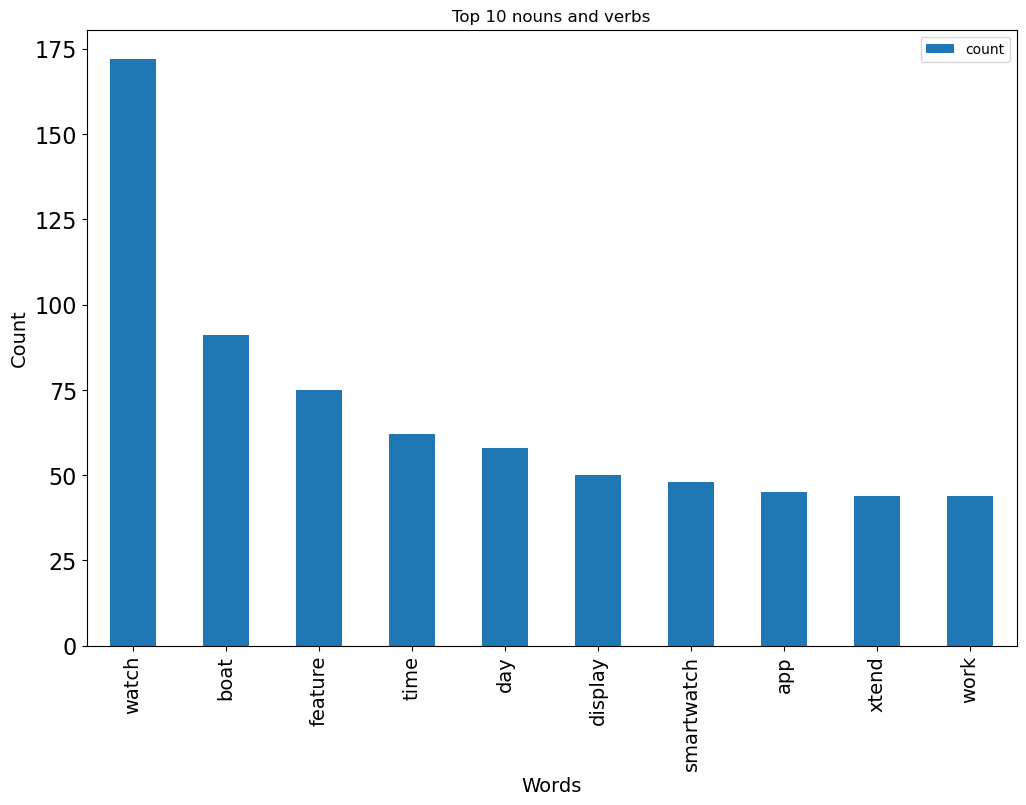

In [75]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Feature Extraction

### A. BOW Features

In [76]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### B. TF-IDF Features

In [77]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## Fetch sentiments Using TextBlob

In [78]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [79]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,98
neg,8


###  Let's calculate subjectivity and Polarity

In [80]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296


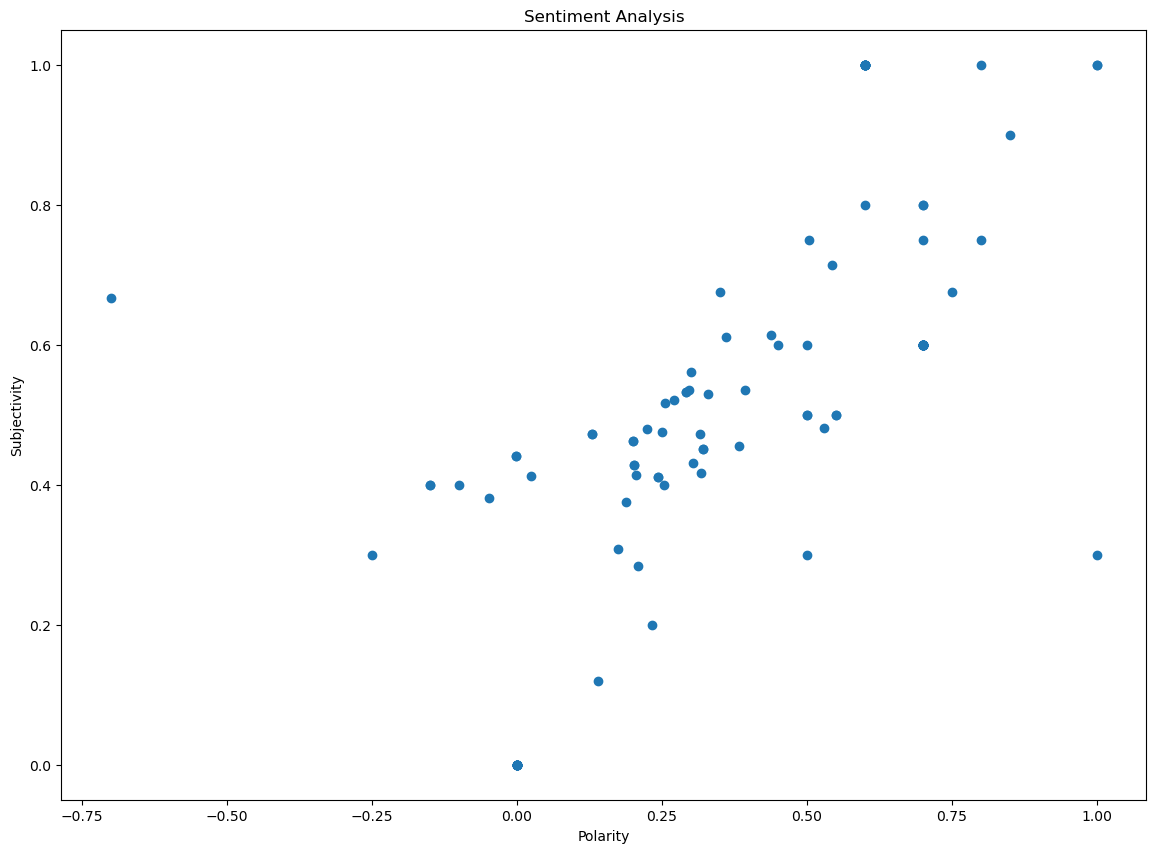

In [81]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [82]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296,pos


## Story Generation and Visualization

In [83]:
from wordcloud import WordCloud

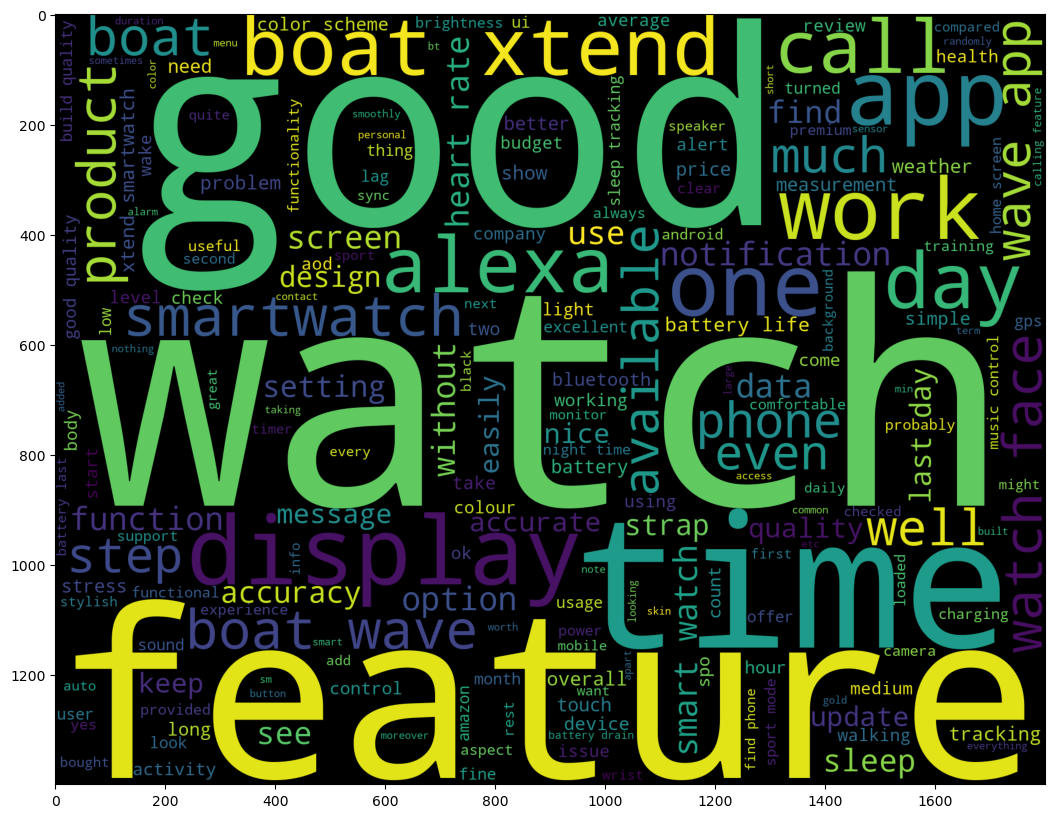

In [84]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### A. Most common words in positive Review

In [85]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

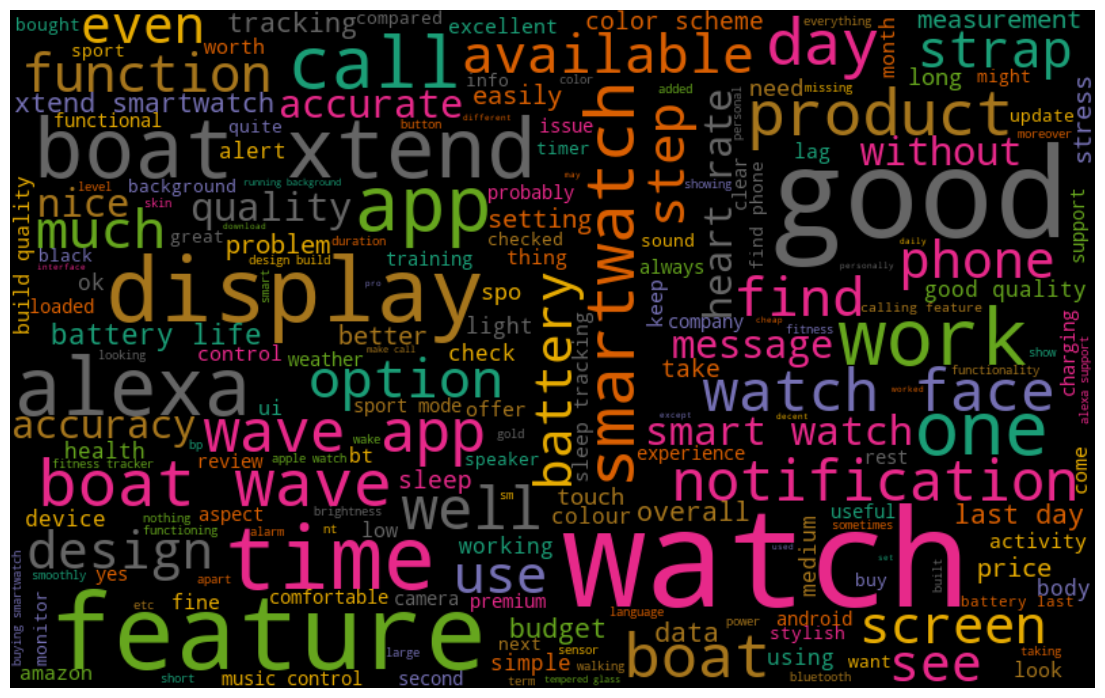

In [86]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

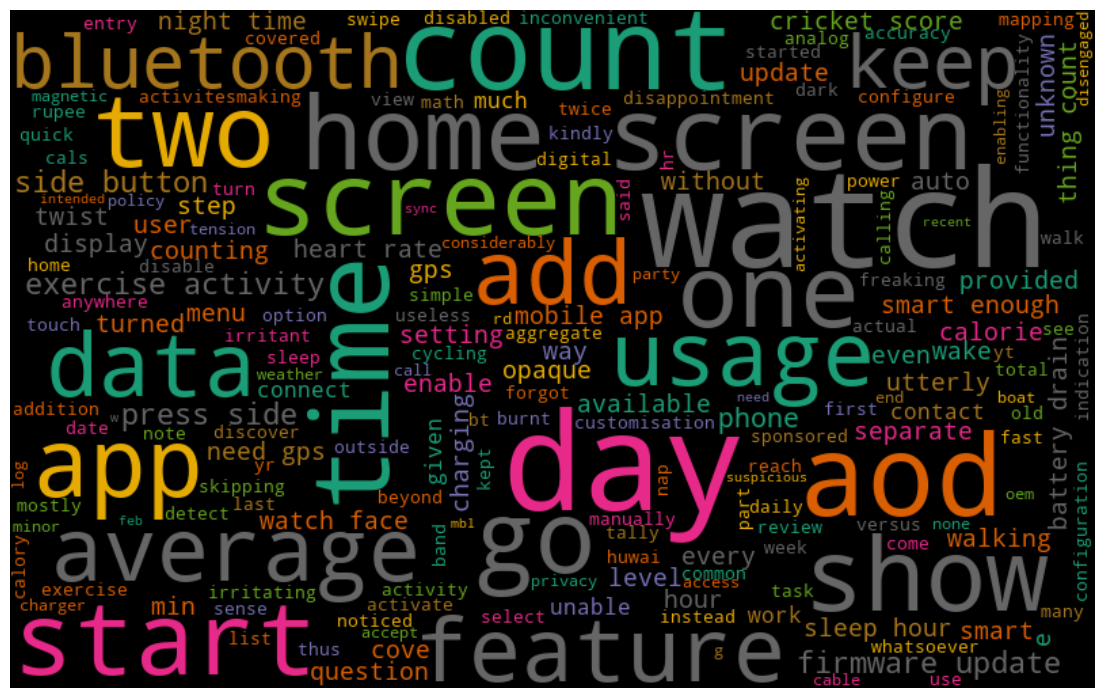

In [87]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)